<br><br><center><h1 style="font-size:3em;color:#2467C0">Mini-Project: UCSanDiegoX DSE200x</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://images.pexels.com/photos/1667583/pexels-photo-1667583.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" align="middle" style="width:550px;height:360px;"/></td>
<td>
In this Mini-Project, I used an open soccer dataset from a popular site <a href="https://www.kaggle.com">Kaggle</a>. This <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. 
<br>
<br>

<br>
<br>    
I answered a research question that relates to the significance of builpUpPlaySpeed or tempo on teams winning ability in football games across the major top-flight football leagues in Europe.    
<br>
<br>
</td>
</tr>
</table>

In [49]:
# Import the needed Python libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

#### Ingest Data

In [50]:
# Create SQLite database connection.

sqlite_cnx = sqlite3.connect('database.sqlite')
print("Connected to SQLite!")


Connected to SQLite!


<h1 style="font-size:2em;color:#2467C0">Explore the dataset and find out how many tables it contains</h1>

There are **7** Tables in our Dataset, minus SQLite internal table (sqlite_sequence). 
<br><br> 
Take a look at what the data columns are using a pandas attribute called "columns".

In [4]:
# Get all the tables in the dataset from "sqlite_schema"

sql_query = """SELECT name FROM sqlite_schema 
WHERE type='table';"""
  
# Create cursor object using connection object
cursor = sqlite_cnx.cursor()
      
# execute sql query
cursor.execute(sql_query)
print("List of the tables in the Dataset:")
      
# Display all tables in the dataset
#cursor.fetchall()
pd.DataFrame(cursor.fetchall())

List of the tables in the Dataset:


,0
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes
8,crew_members


### Query the tables to see the contents of the columns, and then pick a table of interest

In [5]:
# Query the Player_Attributes Table

#PA_df = pd.read_sql_query("SELECT * FROM Player_Attributes", sqlite_cnx)
#PA_df
#PA_df.shape

In [6]:
# Columns in the Player_Attributes Table

#PA_df.columns
#pd.DataFrame(PA_df.columns)

In [7]:
# Query the Player Table

#P_df = pd.read_sql_query("SELECT * FROM Player", sqlite_cnx)
#P_df
#P_df.shape

In [8]:
# Columns in the Player Table

#P_df.columns
#pd.DataFrame(P_df.columns)

In [9]:
# Query the Team Table

#T_df = pd.read_sql_query("SELECT * FROM Team", sqlite_cnx)
#T_df
#T_df.shape

In [10]:
# Columns in the Team Table

#T_df.columns
#pd.DataFrame(T_df.columns)

### Table of interest, Team_Attributes, with 1458 rows and 25 columns

In [11]:
# Query the Team_Attributes Table

TA_df = pd.read_sql_query("SELECT * FROM Team_Attributes", sqlite_cnx)
#pd.set_option('display.max_rows', 1500)
TA_df.head(10)


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [12]:
# Shape of Team_Attributes Table

TA_df.shape

(1458, 25)

In [13]:
# Columns in the Team_Attributes Table

TA_df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [14]:
# Put the columns in a DataFrame to have a nicer look of it.

pd.DataFrame(TA_df.columns)

,0
0,id
1,team_fifa_api_id
2,team_api_id
3,date
4,buildUpPlaySpeed
5,buildUpPlaySpeedClass
6,buildUpPlayDribbling
7,buildUpPlayDribblingClass
8,buildUpPlayPassing
9,buildUpPlayPassingClass


### Get simple statistics of the dataset

In [15]:
TA_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [21]:
# Filter out NULL row(s)

TA_df.isnull().any().any(), TA_df.shape

(True, (1458, 25))

Find out how many data points in each column of the dataset are NULL

Only the "buildUpPlayDribbling" column contains NULL values

In [22]:
TA_df.isnull().sum(axis=0)

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [24]:
# Take initial number of rows

rows = TA_df.shape[0]

# Drop the NULL rows
TA_df = TA_df.dropna()

Check again for NULL values and number of rows to confirm that there are no NULL values, and that the number of rows reduced accordingly.

In [25]:
# Check that all NULLS are gone

print(rows)
TA_df.isnull().any().any(), TA_df.shape

1458


(False, (489, 25))

Find out how many lines that were removed by subtracting the current number of rows in the current data frame from the original number of rows.

In [26]:
# How many rows with NULL values?

rows - TA_df.shape[0]

969

## Get histograms of buildUpPlaySpeed, buildUpPlayPassing and chanceCreationPassing

array([[<AxesSubplot:title={'center':'buildUpPlaySpeed'}>]], dtype=object)

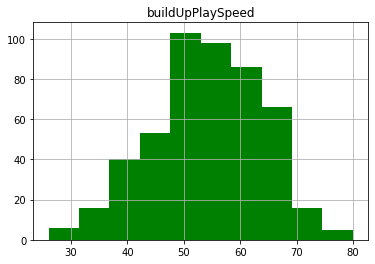

In [27]:
graph1 = TA_df.hist(column="buildUpPlaySpeed", color= 'green')
plt.savefig("graph1.pdf", dpi=300)
graph1

array([[<AxesSubplot:title={'center':'buildUpPlayPassing'}>]],
      dtype=object)

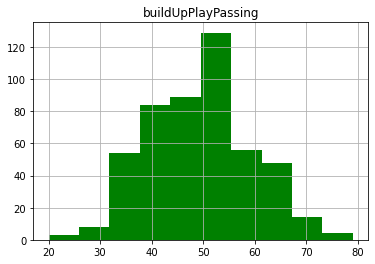

In [28]:
graph2 = TA_df.hist(column="buildUpPlayPassing", color= 'green')
plt.savefig("graph2.pdf", dpi=300)
graph2

array([[<AxesSubplot:title={'center':'chanceCreationPassing'}>]],
      dtype=object)

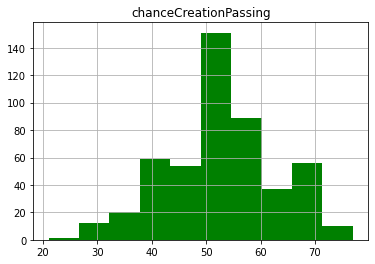

In [29]:
graph3 = TA_df.hist(column="chanceCreationPassing", color= 'green')
plt.savefig("graph3.pdf", dpi=300)
graph3

Team_Attributes Table has 1458 rows but 969 of were removed because they contain NULL value, and these values are all under the "buildUpPlayDribbling" column. The table of interest is now read for further exploratory analysis but only a few lines can be looked at at a time, hence the need to shuffle the dataset so there is a randomly generated list of the rows can be generated.

In [31]:
# Shuffle the rows of TA to get a distributed sample of the top few rows.

TA_df = TA_df.reindex(np.random.permutation(TA_df.index))

<h1 style="font-size:1.5em;color:#2467C0">How 'buildUpPlaySpeed' of a team relates to the other team_attributes</h1>

A look at the first **20** rows.

In [32]:
# See the first 10 rows

TA_df.head(10)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
521,522,110565,8019,2015-09-10 00:00:00,41,Balanced,40.0,Normal,59,Mixed,...,54,Normal,Organised,52,Medium,47,Press,50,Normal,Cover
858,859,111560,274581,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,...,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover
877,878,1823,8481,2014-09-19 00:00:00,49,Balanced,48.0,Normal,49,Mixed,...,67,Lots,Organised,43,Medium,46,Press,50,Normal,Cover
75,76,1,9825,2015-09-10 00:00:00,59,Balanced,51.0,Normal,30,Short,...,46,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
81,82,2,10252,2015-09-10 00:00:00,63,Balanced,37.0,Normal,54,Mixed,...,38,Normal,Organised,35,Medium,44,Press,54,Normal,Cover
752,753,1844,8537,2014-09-19 00:00:00,58,Balanced,58.0,Normal,67,Long,...,77,Lots,Organised,29,Deep,57,Press,32,Narrow,Cover
1389,1390,19,8654,2015-09-10 00:00:00,77,Fast,37.0,Normal,57,Mixed,...,29,Little,Organised,30,Deep,37,Press,41,Normal,Cover
1437,1438,900,10192,2014-09-19 00:00:00,52,Balanced,56.0,Normal,64,Mixed,...,46,Normal,Organised,44,Medium,34,Press,50,Normal,Cover
69,70,112513,158085,2015-09-10 00:00:00,65,Balanced,66.0,Normal,39,Mixed,...,46,Normal,Organised,37,Medium,39,Press,37,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


**Take each column of the Team_Attributes as an attribute or feature for analysis.**

Take the first 5 rows features "buildUpPlaySpeed" and "chanceCreationPassing"

In [33]:
TA_df[:5][['buildUpPlaySpeed', 'chanceCreationPassing']]

,buildUpPlaySpeed,chanceCreationPassing
521,41,41
858,50,50
877,49,52
75,59,28
81,63,60


## Feature Correlation Analysis 
Check how 'the features' correlate to 'buildUpPlaySpeed'.

# Use Pearson's correlation coefficient) to find out the degree of correlation?

In [35]:
# 'buildUpPlaySpeed' and 'defencePressure' correlation

TA_df['buildUpPlaySpeed'].corr(TA_df['defencePressure'])

-0.2015282407072216

The result of the previous shows negative correlation of "builpUpPlaySpeed" to "defencePressure". What about the correlation of "buildUpPlaySpeed" to "chanceCreationPassing" ?

In [37]:
TA_df['buildUpPlaySpeed'].corr(TA_df['chanceCreationPassing'])

0.2512455262535971

**We see a negative and positive correlation of a team's buildUpPlaySpeed to defencePressure and chanceCreationPassing respectively**

## Create a list of more features to measure correlation with and loop throug the list

In [38]:
features = ['defencePressure', 'defenceAggression', 'chanceCreationCrossing',
            'chanceCreationShooting', 'chanceCreationPassing', 'buildUpPlayDribbling', 'buildUpPlayPassing']

In [39]:
# loop through to see how these features correlate to buildUpPlaySpeed

for f in features:
    related = TA_df['buildUpPlaySpeed'].corr(TA_df[f])
    print("%s: %f" % (f,related))

defencePressure: -0.201528
defenceAggression: 0.041660
chanceCreationCrossing: 0.124391
chanceCreationShooting: 0.115705
chanceCreationPassing: 0.251246
buildUpPlayDribbling: 0.067988
buildUpPlayPassing: 0.297346


## Features with the highest correlation with buildUpPlaySpeed?

Looking at the values printed in the previous cell, we notice that two features, "buildUpPlayPassing" (0.30) and "chanceCreationPassing" (0.25), correlate more positively to "buildUpPlaySpeed" for a team. 


<h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1>

Plot the correlation coefficients ot the features with "buildUpPlaySpeed".

In [40]:
graph1 =attr.sort_values(by="winner", ascending=False)
graph1.hist(column="buildUp_PlaySpeed");

NameError: name 'attr' is not defined

In [41]:
# Select columns

cols = ['defencePressure', 'defenceAggression', 'chanceCreationCrossing',
            'chanceCreationShooting', 'chanceCreationPassing', 
        'buildUpPlayDribbling', 'defenceTeamWidth', 'buildUpPlayPassing']

In [42]:
# Create a list containing correlation between 'buildUpPlaySpeed' with each column in cols

correlations = [ TA_df['buildUpPlaySpeed'].corr(TA_df[f]) for f in cols]

In [43]:
# Make sure the number of selected features equals "the calculated correlations"

len(cols), len(correlations)

(8, 8)

In [44]:
# Create a function for plotting the a dataframe with string columns and numeric values

def plot_dataframe(TA_df, y_label):
    color= 'green'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)
    
    ax = TA_df.correlations.plot(linewidth=3.3, color=color)
    ax.set_xticks(TA_df.index)
    ax.set_xticklabels(TA_df.attributes, rotation=75); # noticed no difference when ; was removed! 
    plt.title('Correlation of Team\'s buildUpPlaySpeed to Team\'s Attributes or Features')
    plt.savefig("buildUpPlaySpeed.pdf", dpi=300)
    plt.show()

In [45]:
# Create a dataframe using cols and correlations

TA2_df = pd.DataFrame({'attributes': cols, 'correlations': correlations})


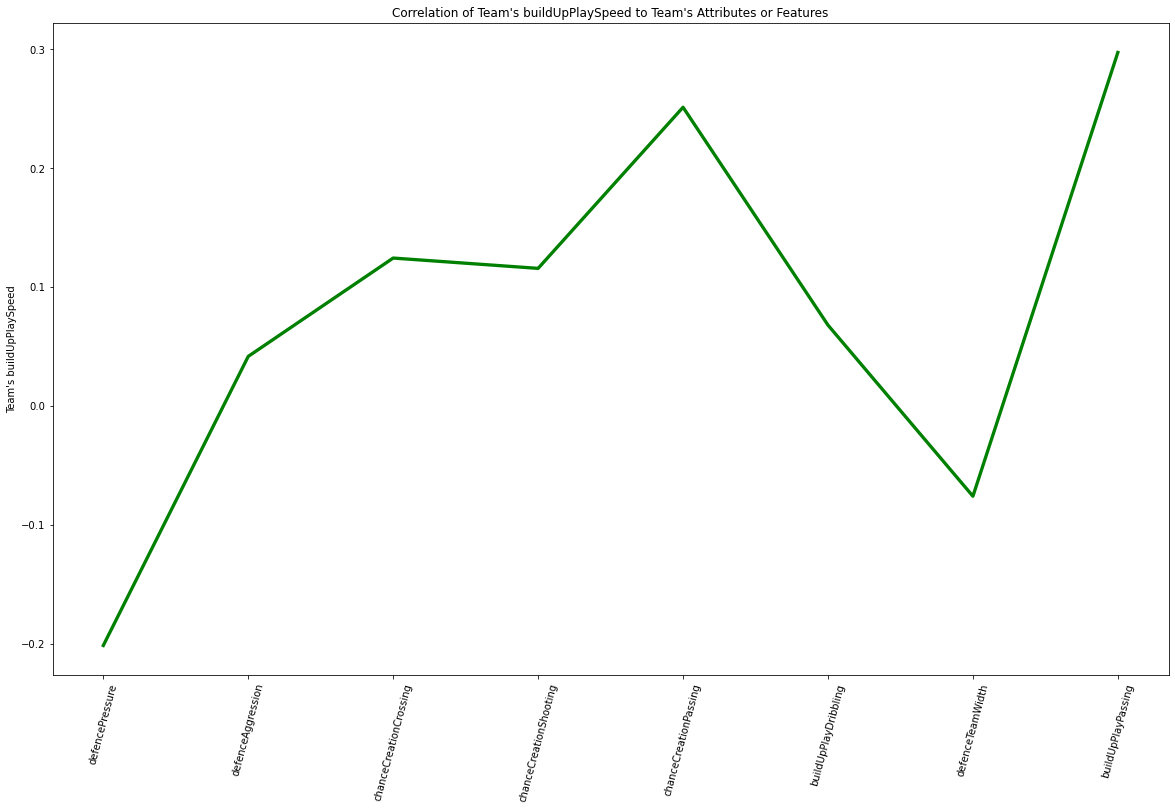

In [48]:
# Plot TA2 using the plot-function

plot_dataframe(TA2_df, 'Team\'s buildUpPlaySpeed')

<h1 style="font-size:2em;color:#FB41C4">Analysis</h1>

**Looking at the above plot, we notice the following:**
   
<ol>
  <li>buildUpPlayPassing has the highest correlation to team's buildUpPlaySpeed, followed by chanceCreationPassing.</li>
  <li> Also, it is obvious that high-pressing teams tend to have the lowest defencePressure.</li>
  <p>Hence, high-pressing teams, which are teams with high buildUpPlaySpeed, will tend to dominate the games more, create more chances, and as a result have more winning chances in the course of a league's campaign.</p>
</ol>

<h1 style="font-size:2em;color:#FB41C4">Find out examples of such teams?</h1>


**Teams with high buildUpPlaySpeed?**

In [646]:
suchTeam_df = pd.read_sql_query("SELECT buildUpPlaySpeed, buildUpPlayPassing, chanceCreationPassing FROM Team_Attributes",
                         sqlite_cnx)
#suchTeam1_df
suchTeam_df.head(5)

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing
0,60,50,60
1,52,56,54
2,47,54,54
3,70,70,70
4,47,52,53


In [647]:
# Get some statistics

suchTeam_df.describe()

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing
count,1458.000000,1458.000000,1458.000000
mean,52.462277,48.490398,52.165295
std,11.545869,10.896101,10.360793
min,20.000000,20.000000,21.000000
25%,45.000000,40.000000,46.000000
50%,52.000000,50.000000,52.000000
75%,62.000000,55.000000,59.000000
max,80.000000,80.000000,80.000000


min is 20, and max is 80 for buildUpPlayPassing. So Team(s) with value 80 or closer to 80 have the highest positive correlation to buildUpPlaySpeed for this dataset.

In [648]:
# Select only the 'buildUpPlayPassing' column and make a list of it

suchTeam_df = list(suchTeam_df['buildUpPlayPassing'])
suchTeam_df

[50,
 56,
 54,
 70,
 52,
 62,
 45,
 62,
 53,
 40,
 45,
 52,
 52,
 52,
 52,
 30,
 50,
 50,
 54,
 52,
 52,
 30,
 50,
 44,
 44,
 44,
 44,
 35,
 53,
 44,
 47,
 55,
 66,
 30,
 38,
 33,
 33,
 30,
 39,
 45,
 53,
 70,
 65,
 65,
 65,
 35,
 52,
 41,
 41,
 51,
 51,
 35,
 50,
 50,
 50,
 50,
 50,
 45,
 37,
 65,
 65,
 33,
 48,
 54,
 54,
 65,
 58,
 55,
 39,
 39,
 30,
 40,
 32,
 29,
 26,
 30,
 59,
 50,
 58,
 59,
 72,
 54,
 40,
 50,
 50,
 36,
 37,
 37,
 45,
 69,
 59,
 38,
 38,
 39,
 30,
 54,
 51,
 51,
 51,
 50,
 45,
 40,
 55,
 55,
 69,
 55,
 70,
 65,
 49,
 49,
 49,
 49,
 45,
 31,
 36,
 40,
 46,
 58,
 30,
 34,
 25,
 32,
 32,
 51,
 30,
 35,
 50,
 57,
 57,
 65,
 45,
 40,
 46,
 46,
 46,
 46,
 30,
 38,
 55,
 55,
 55,
 55,
 40,
 40,
 40,
 41,
 22,
 28,
 35,
 37,
 55,
 39,
 46,
 48,
 48,
 30,
 52,
 52,
 50,
 54,
 30,
 35,
 48,
 54,
 53,
 53,
 70,
 60,
 55,
 57,
 79,
 75,
 70,
 65,
 57,
 64,
 62,
 65,
 70,
 30,
 52,
 52,
 72,
 64,
 50,
 65,
 56,
 48,
 48,
 48,
 57,
 55,
 35,
 50,
 48,
 48,
 48,
 70,
 70,
 56,


Find out how many rows in buildUpPlayPassing are 75 and above

In [649]:
for value in suchTeam_df:
  if value < 75:
    continue
  print(value)

79
75
77
75
80
75


<h1 style="font-size:1.2em;color:#FB41C4">Find out the teams with such high buildUpPlayPassing and use domain knowledge to see if it is actually true</h1>

Can the "id" be used to identify a team?

In [650]:
df = pd.read_sql_query("SELECT id FROM Team_Attributes where  buildUpPlayPassing > 74", sqlite_cnx)
#pd.set_option('display.max_rows', 1500)
df

,id
0,171
1,172
2,342
3,1218
4,1244
5,1245


Find out the id for the team where buildUpPlayPassing value is 80

In [651]:
df80 = pd.read_sql_query("SELECT id FROM Team_Attributes where  buildUpPlayPassing = 80", sqlite_cnx)
#pd.set_option('display.max_rows', 1500)
df80

,id
0,1244


**Go to the Team table and see if there is a way to get the "team_long_name" given the id from the Team_Attributes table**

In [656]:
# Select a few rows from the Team table to see the column in it

team_df = pd.read_sql_query("SELECT * FROM Team ", sqlite_cnx)
team_df.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [657]:
# Select a few rows from the Team_Attributes table to see the column in it

teamAttribute_df = pd.read_sql_query("SELECT * FROM Team_Attributes ", sqlite_cnx)
teamAttribute_df.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


The columns in both table are really different but **id** appears in both tables. If the configuration of **id** in both table are the same, then we can identify a team using team_long_name, and then make use our knowledge.

In [661]:
# Get the team_long_name where id is 1244

teamid_1244_df = pd.read_sql_query("SELECT team_long_name FROM Team where id = 1244", sqlite_cnx)
teamid_1244_df

,team_long_name


In [663]:
# There is no such team with id 1244 in the Team table
# Null string

len(teamid_1244_df)

0

In [666]:
# What about id 1245

teamid_1245_df = pd.read_sql_query("SELECT team_long_name FROM Team where id = 1245", sqlite_cnx)
teamid_1245_df

,team_long_name


In [668]:
# There is also nothing like that
# Also null string

len(teamid_1245_df)

0

In [672]:
# 172 ?

#teamid_172_df = pd.read_sql_query("SELECT team_long_name FROM Team where id = 172", sqlite_cnx)
#teamid_172_df




In [671]:
# Also a null string

#len(teamid_172_df)

<h1 style="font-size:1.5em;color:#FB41C4"> Conclusions</h1>

From the plot, we see that for teams where "buildUpPlayPassing" correlation coefficient with respect to "buildUpPlaySpeed" is high and positive, "chanceCreationPassing" is also high and positive. It is also clear from the plot that "defencePressure" correlates negatively to "buildUpPlaySpeed"; other team_attributes fall in between.

As an enthusiastic football fan, who is very knowlegeable in both local (German) and European top-flight football games, being able to identify such teams where  "buildUpPlaySpeed" and "buildUpPlayPassing" are highest in the dataset would have helped to easily apply my domain knowledge here, and hence come to a much more clear-cut conclusion but unfortunately, the Team_Attributes table does not contain the "team_long_name" column or any other attribute that can help identify a team from the "Team" table given its id from the "Team_Attributes" table.

The "id" columns in both Team and Team_Attributes tables have different configurations, and as such does not create any possibility of knowing the "team_long_name", which is only given in the Team table, given its id from the Team_attributes table.

Other than the limitation presented in the previous paragraph, this dataset captures a striking relationship amongst a few features for a football teams in Europe, which are quite vital to winning.
Without making reference to a particular team, which is also not possible with the dataset, I would conclude that teams with high "biuldUpPlaySpeed" tend also to have high buildUpPlayPassing and chanceCreationPassing, and these are key components to having a domineering league campaign across the major top-flight football leagues in Europe.